# Data cleaning, Preprocessing & exploration
### Data Visualisation - Project 

1. [Data cleaning and Preprocessing](#cleaning)

2. [Data exploration](#exploration) <br>
    2.1 [Visualize](#visualize) <br>
    2.2 [Unknown quantification](#unknownStudy)

In [1]:
#Usefull imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<a id='cleaning'></a>

### Data cleaning and preprocessing

We have one file per cryptocurrency with many difference data. Here is the list of the different data that we have (corresponding to header of csv files): Date, Open price, High price, Low price, Close price, Volume, Market Cap <br>
We want to have in a single file the first column as date and one column per cryptocurrency with one of the value listed above. <br>
__Note__ : Arbitrarily, we chose to use the Open price. If another value is desired, it is easily modified in the csv_into_df function.

In [2]:
#Function that reads the csv file of a cryptocurrency and returns the dataframe with date
#and value asked.
def csv_into_df(data_path, crypto_name):
    ### A row looks like: Nov 07, 2017,7023.10,7253.32,7023.10,7144.38,"2,326,340,000","117,056,000,000"
    X = np.genfromtxt(data_path, dtype= str, delimiter=',', skip_header = True, usecols = (0, 1, 2, 3, 4, 5))
    dates = []
    prices = []
    
    for i in range(X.shape[0]):
        #Concatenate date with year
        date = X[i][0] + ' ' + X[i][1]
        dates.append(date)
        #Keep only the desired price value
        ### 2 for Open Price
        price = X[i][2]
        prices.append(price)
    #Build the dataframe with date and price value 
    df = pd.DataFrame(np.column_stack([dates, prices]), columns=['Date', crypto_name])
    return df

In [4]:
#Create dataframe for every csv file with the cryptocurrency abbreviation as name
bitcoin_df = csv_into_df('data/bitcoin_price.csv','BTC')
ether_df = csv_into_df('data/ethereum_price.csv','ETH')
neo_df = csv_into_df('data/neo_price.csv','NEO')
ripple_df = csv_into_df('data/ripple_price.csv','XRP')
BC_df = csv_into_df('data/bitcoin_cash_price.csv','BCH')
dash_df = csv_into_df('data/dash_price.csv','DASH')
bitconnect_df = csv_into_df('data/bitconnect_price.csv','BCC')
etherC_df = csv_into_df('data/ethereum_classic_price.csv','ETC')
iota_df = csv_into_df('data/iota_price.csv','MIOTA')
ltc_df = csv_into_df('data/litecoin_price.csv','LTC')
monero_df = csv_into_df('data/monero_price.csv','XMR')
nem_df = csv_into_df('data/nem_price.csv','XEM')
numeraire_df = csv_into_df('data/numeraire_price.csv','NMR')
stratis_df = csv_into_df('data/stratis_price.csv','STRAT')
waves_df = csv_into_df('data/waves_price.csv','WAVES')

In [5]:
#We need to merge all the dataframes
#We use the 'Date' as join criteria
final_df = bitcoin_df.merge(ether_df, how = 'outer', on = 'Date')
final_df = final_df.merge(neo_df, how = 'outer', on = 'Date')
final_df = final_df.merge(ripple_df, how = 'outer', on = 'Date')
final_df = final_df.merge(BC_df, how = 'outer', on = 'Date')
final_df = final_df.merge(dash_df, how = 'outer', on = 'Date')
final_df = final_df.merge(bitconnect_df, how = 'outer', on = 'Date')
final_df = final_df.merge(etherC_df, how = 'outer', on = 'Date')
final_df = final_df.merge(iota_df, how = 'outer', on = 'Date')
final_df = final_df.merge(ltc_df, how = 'outer', on = 'Date')
final_df = final_df.merge(monero_df, how = 'outer', on = 'Date')
final_df = final_df.merge(nem_df, how = 'outer', on = 'Date')
final_df = final_df.merge(numeraire_df, how = 'outer', on = 'Date')
final_df = final_df.merge(stratis_df, how = 'outer', on = 'Date')
final_df = final_df.merge(waves_df, how = 'outer', on = 'Date')

In [6]:
#In order to have a clean data, we need to fill the unknown values as 0
final_df = final_df.fillna(0)
#Let us have a look at our data
final_df.head()

,Date,BTC,ETH,NEO,XRP,BCH,DASH,BCC,ETC,MIOTA,LTC,XMR,XEM,NMR,STRAT,WAVES
0,"""Nov 07 2017""",7023.10,298.57,26.26,0.205103,602.68,274.87,260.04,14.14,0.371509,54.99,104.23,0.186479,10.77,3.01,3.52
1,"""Nov 06 2017""",7403.22,296.43,26.47,0.201967,630.31,273.47,276.58,13.30,0.351011,54.76,86.42,0.181340,11.26,3.04,3.46
2,"""Nov 05 2017""",7404.52,300.04,26.48,0.203274,619.91,274.33,278.10,11.86,0.367915,55.03,87.31,0.170760,11.45,3.00,3.61
3,"""Nov 04 2017""",7164.48,305.48,26.77,0.208083,635.35,278.58,270.45,12.63,0.391327,56.22,87.90,0.171515,12.45,3.12,3.65
4,"""Nov 03 2017""",7087.53,288.50,24.60,0.206205,587.32,263.89,262.93,10.24,0.362970,54.58,83.53,0.166597,9.15,2.84,3.21


In [7]:
#We can finally write this dataframe as a csv file and use it to visualize
#final_df.to_csv("crypto_prices.csv", sep = ',', index = False)

<a id='exploration'></a>

### Data exploration

In order to get some insights about the data, let us try to plot as lines. This is the usual way to represent this data.

In [8]:
#Make sure all the columns (except the date) are floats
for c in final_df.columns[1:]:
    final_df[c] = final_df[c].astype(float)

In [9]:
final_df.dtypes

Date      object
BTC      float64
ETH      float64
NEO      float64
XRP      float64
BCH      float64
DASH     float64
BCC      float64
ETC      float64
MIOTA    float64
LTC      float64
XMR      float64
XEM      float64
NMR      float64
STRAT    float64
WAVES    float64
dtype: object

In [10]:
#Set the date as index
final_df = final_df.set_index('Date')

In [11]:
#Inverse the order of dates, so that the most recent is last
final_df = final_df.iloc[::-1]
final_df.head()

,BTC,ETH,NEO,XRP,BCH,DASH,BCC,ETC,MIOTA,LTC,XMR,XEM,NMR,STRAT,WAVES
Date,,,,,,,,,,,,,,,
"""Apr 28 2013""",135.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.30,0.0,0.0,0.0,0.0,0.0
"""Apr 29 2013""",134.44,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.37,0.0,0.0,0.0,0.0,0.0
"""Apr 30 2013""",144.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.40,0.0,0.0,0.0,0.0,0.0
"""May 01 2013""",139.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.29,0.0,0.0,0.0,0.0,0.0
"""May 02 2013""",116.38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.78,0.0,0.0,0.0,0.0,0.0


<a id='visualize'></a>

#### Visualize

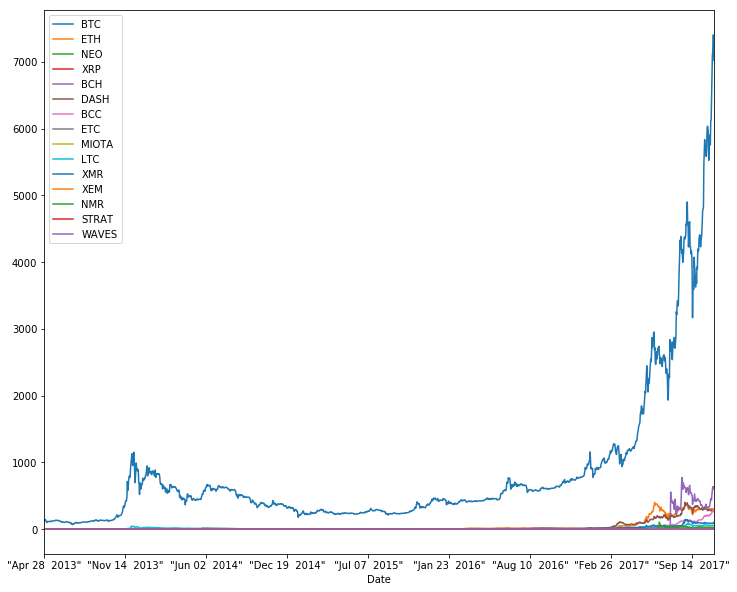

In [12]:
#Plot the lines naively
final_df.plot(kind = 'line', figsize = (12,10))
plt.show()

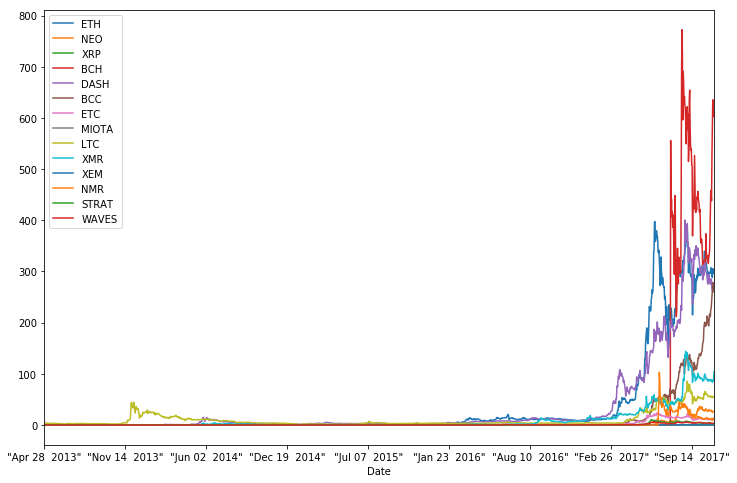

In [13]:
#Now that we see that Bitcoin dominates the graph,
#Plot all the other cryptocurrencise to see their evolution
cols = final_df.columns[1:]
final_df[cols].plot(kind = 'line', figsize = (12,8))
plt.show()

<a id='unknownStudy'></a>

#### Unknown quantification
We clearly see that some cryptocurrencies have zero values for a long time. We want to know the first date of apparition and the proportion of unknown for each cryptocurrency.

In [14]:
#For every cryptocurrency (columns of the dataframe)
#Get the date (index) of the first non-zero value
for c in final_df.columns : 
    index = final_df[c].nonzero()[0][0]
    print(c, " from ", final_df.index[index])

BTC  from  "Apr 28  2013"
ETH  from  "Aug 07  2015"
NEO  from  "Sep 09  2016"
XRP  from  "Aug 04  2013"
BCH  from  "Jul 23  2017"
DASH  from  "Feb 14  2014"
BCC  from  "Jan 20  2017"
ETC  from  "Jul 24  2016"
MIOTA  from  "Jun 13  2017"
LTC  from  "Apr 28  2013"
XMR  from  "May 21  2014"
XEM  from  "Apr 01  2015"
NMR  from  "Jun 23  2017"
STRAT  from  "Aug 12  2016"
WAVES  from  "Jun 02  2016"


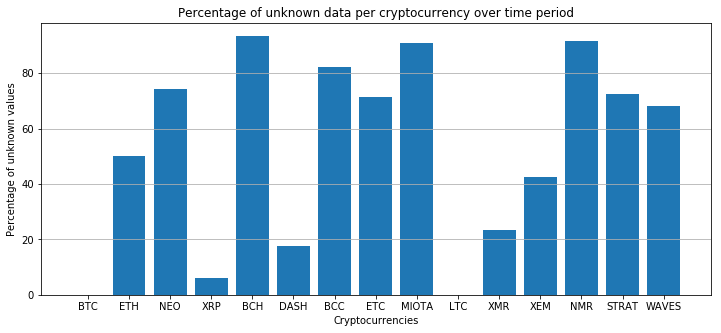

In [15]:
#To compute the percentages, we count the number of zero values and divide by number of values
percentages = np.round((final_df == 0).astype(int).sum(axis = 0)*100/len(final_df),2)

#Plot percentages
fig = plt.figure()
fig.set_size_inches(12,5)
plt.gca().yaxis.grid(True)
plt.bar(range(len(percentages)),percentages.values)
plt.xticks(range(len(percentages)), percentages.index)
plt.title('Percentage of unknown data per cryptocurrency over time period')
plt.xlabel('Cryptocurrencies')
plt.ylabel('Percentage of unknown values')
plt.show()